In [1]:
!pip install tensorflow-datasets

In [2]:
!pip install opencv-python

In [3]:
import cv2

In [4]:
cv2.__version__

'4.7.0'

In [5]:
import tensorflow_datasets as tfds

In [ ]:
(train_ds,train_labels),(test_ds,test_labels)=tfds.load('tf_flowers',
                                                         split=['train[:70%]','train[70%:]'],
                                                         batch_size=-1,
                                                         as_supervised=True)

In [2]:
train_ds

NameError: name 'train_ds' is not defined

In [8]:
train_ds[0].shape

TensorShape([442, 1024, 3])

In [9]:
import matplotlib.pyplot as plt

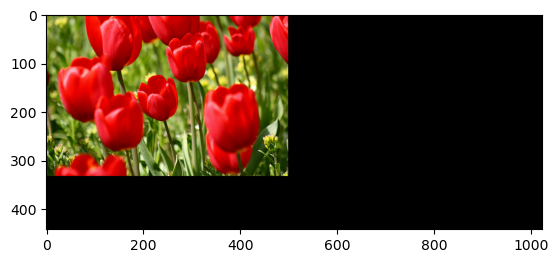

In [10]:
plt.imshow(train_ds[0])
plt.show()

In [11]:
from tensorflow.keras.applications.vgg16 import VGG16,preprocess_input

In [12]:
base_model=VGG16()

In [13]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [14]:
base_model=VGG16(include_top=False,
                weights='imagenet',
                input_shape=train_ds[0].shape)

In [15]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 442, 1024, 3)]    0         
                                                                 
 block1_conv1 (Conv2D)       (None, 442, 1024, 64)     1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 442, 1024, 64)     36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 221, 512, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 221, 512, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 221, 512, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 110, 256, 128)     0     

In [16]:
base_model1=VGG16(include_top=True,
                weights='imagenet')

In [17]:
base_model1.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [18]:
base_model1=VGG16(include_top=True,
                weights='imagenet')
base_model1.trainable=False

In [19]:
base_model1.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [20]:
import tensorflow as tf

In [21]:
train_ds=tf.image.resize(train_ds,(200,200))
test_ds=tf.image.resize(test_ds,(200,200))

In [22]:
train_ds=preprocess_input(train_ds)
test_ds=preprocess_input(test_ds)

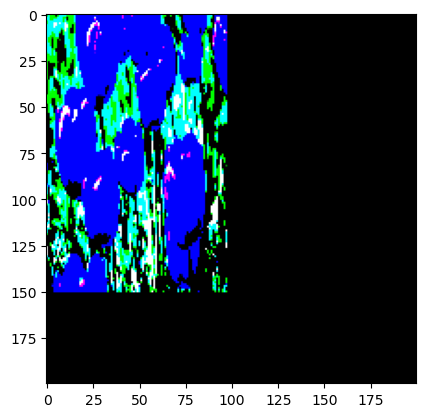

In [23]:
plt.imshow(train_ds[0])
plt.show()

In [24]:
base_model=VGG16(include_top=False,
                weights='imagenet',
                input_shape=train_ds[0].shape)

base_model.trainable=False

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Dropout

In [26]:
model=Sequential()
model.add(base_model)

model.add(Flatten())
model.add(Dense(10000,activation='relu'))
model.add(Dense(500,activation='relu'))
model.add(Dense(5,activation='softmax'))

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 6, 6, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 18432)             0         
                                                                 
 dense (Dense)               (None, 10000)             184330000 
                                                                 
 dense_1 (Dense)             (None, 500)               5000500   
                                                                 
 dense_2 (Dense)             (None, 5)                 2505      
                                                                 
Total params: 204,047,693
Trainable params: 189,333,005
Non-trainable params: 14,714,688
_________________________________________________________________


In [28]:
model=Sequential()
model.add(base_model)

model.add(Flatten())
model.add(Dropout(0.20))
model.add(Dense(500,activation='relu'))
model.add(Dense(250,activation='relu'))
model.add(Dense(5,activation='softmax'))

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 6, 6, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 18432)             0         
                                                                 
 dropout (Dropout)           (None, 18432)             0         
                                                                 
 dense_3 (Dense)             (None, 500)               9216500   
                                                                 
 dense_4 (Dense)             (None, 250)               125250    
                                                                 
 dense_5 (Dense)             (None, 5)                 1255      
                                                                 
Total params: 24,057,693
Trainable params: 9,343,005
N

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc'])
model.fit(train_ds,train_labels,epochs=1,batch_size=128,validation_data=(test_ds,test_labels))

In [2]:
import cv2

In [4]:
img_file="Img_CV\stev.jpg"

img1=cv2.imread(img_file)

In [5]:
type(img1)

numpy.ndarray

In [6]:
img1.shape

(271, 186, 3)

In [7]:
import matplotlib.pyplot as plt

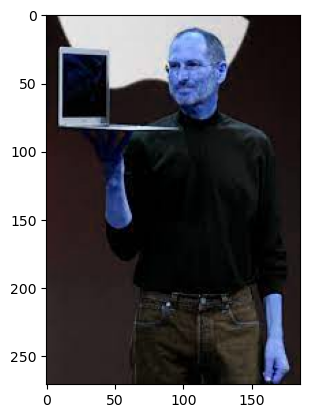

In [8]:
plt.imshow(img1)
plt.show()

In [ ]:
# displaying image using cv2

cv2.imshow('win',img1)
if cv2.waitKey(0) & 0xFF==ord('q'):
    cv2.destroyAllWindows()